<a href="https://colab.research.google.com/github/Siriyakon-Saenpor/229351_Statistical-Learning-for-Data-Science-1/blob/main/Copy_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=9)

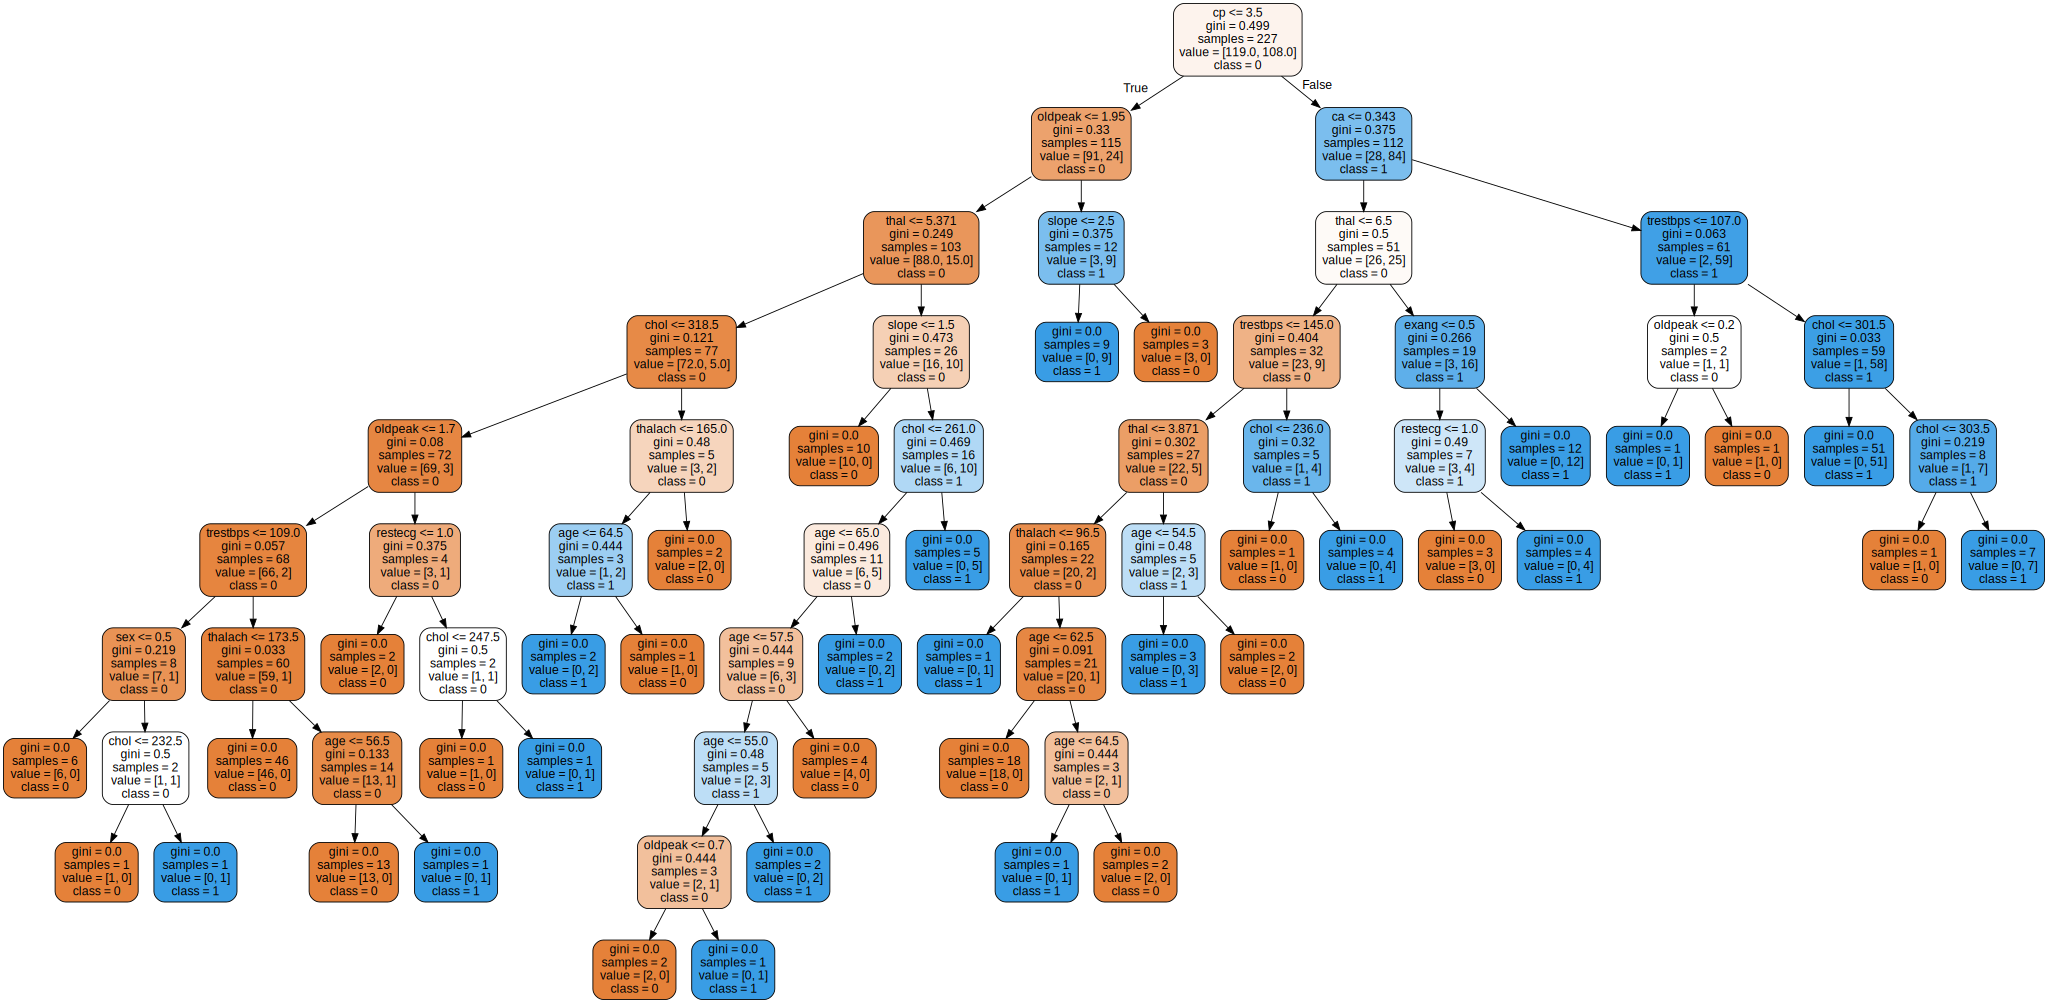

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [9]:
from sklearn.metrics import classification_report

y_pred = gridcv.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        45
           1       0.59      0.65      0.62        31

    accuracy                           0.67        76
   macro avg       0.66      0.67      0.66        76
weighted avg       0.68      0.67      0.67        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [10]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)

bagged_trees.fit(X_train, y_train)

ypred_bt = bagged_trees.predict(X_test)

print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.74      0.65      0.69        31

    accuracy                           0.76        76
   macro avg       0.76      0.74      0.75        76
weighted avg       0.76      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [11]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [12]:
from sklearn.metrics import f1_score, accuracy_score

In [13]:
pipe_dt = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', DecisionTreeClassifier())])
params_dt = {'clf__max_depth': [3, 6, 9, 12], 'clf__min_samples_split': [2, 5, 10], 'clf__criterion': ['gini', 'entropy']}

pipe_bag = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', RandomForestClassifier())])
params_bag = {'clf__n_estimators': [10, 50, 100], 'clf__max_samples': [0.5, 0.8, 1.0], 'clf__max_features': [0.5, 0.8, 1.0]}

pipe_rf = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('clf', RandomForestClassifier())])
params_rf = {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20], 'clf__min_samples_leaf': [1, 2, 4]}

In [15]:
models = [('Decision Tree', pipe_dt, params_dt), ('Bagging', pipe_bag, params_bag), ('Random Forest', pipe_rf, params_rf)]

best ={}

for name, pipe, params in models:
    grid = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    best[name] = grid

for name, grid in best.items():
    ypred = grid.predict(X_test)
    ac = accuracy_score(y_test, ypred)
    f1 = f1_score(y_test, ypred, average='macro')
    print(f"{name}: accuracy = {ac}, f1 = {f1}")
    print(f"Best params: {grid.best_params_}")

Decision Tree: accuracy = 0.7105263157894737, f1 = 0.7072829131652661
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_split': 10}
Bagging: accuracy = 0.7236842105263158, f1 = 0.712484237074401
Best params: {'clf__max_features': 0.5, 'clf__max_samples': 0.8, 'clf__n_estimators': 100}
Random Forest: accuracy = 0.75, f1 = 0.736832513213049
Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 200}


- โมเดลที่ดีที่สุดคือ Random Forest เพราะ มีค่า f1 = 0.7368 (มากที่สุด)

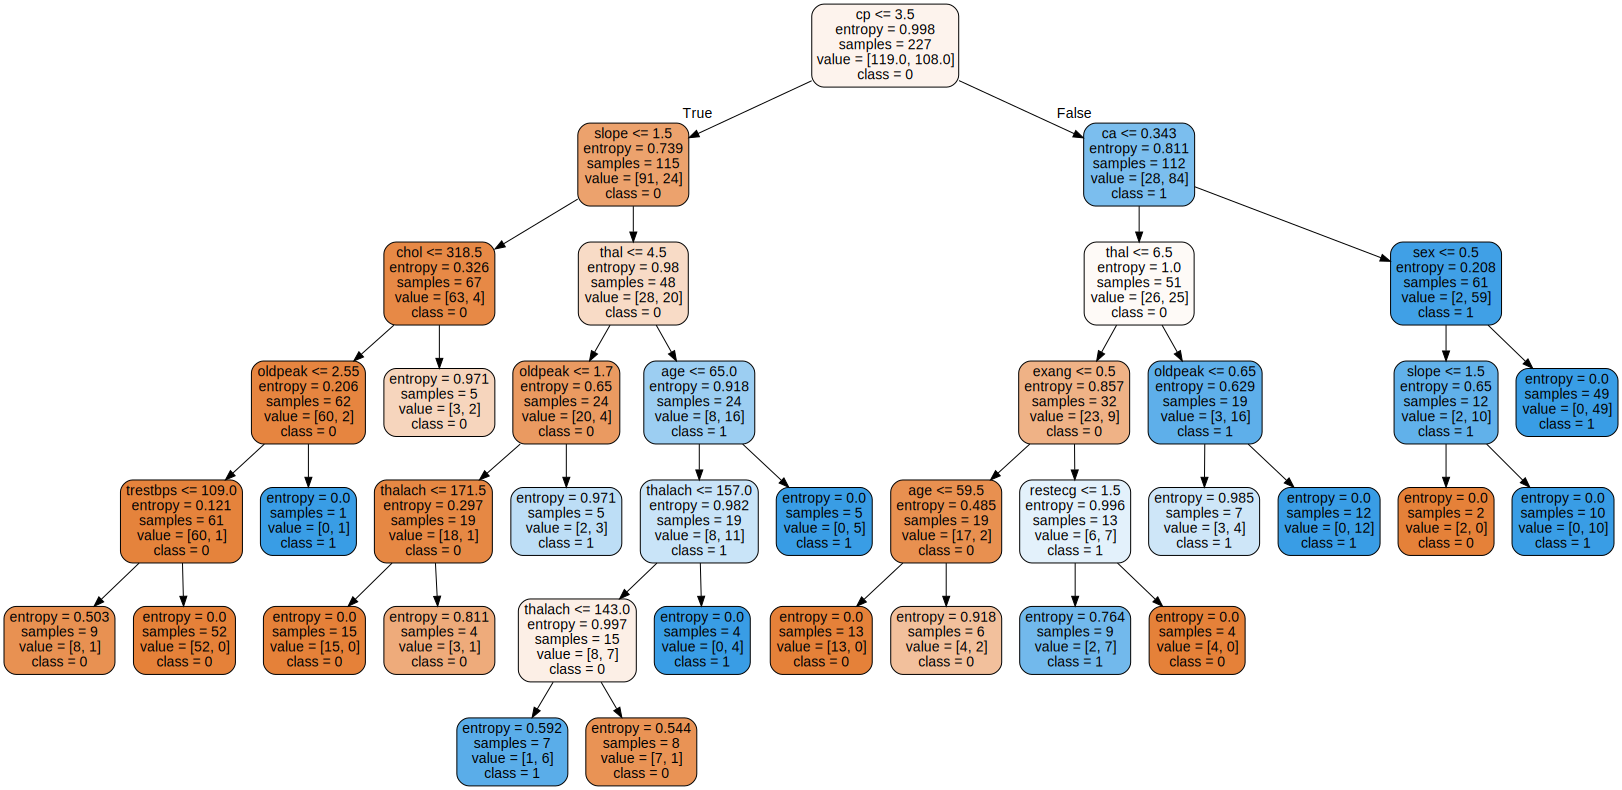

In [30]:
best_dt_pipeline = best['Decision Tree'].best_estimator_
tree_plot = best_dt_pipeline.named_steps['clf']

plot_data = export_graphviz(tree_plot,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

- Decision Tree ปรับความลึกของต้นไม้, จำนวนขั้นต่ำที่ใช้ในการแยดโหนด, เกณฑ์การวัดคุณภาพการแยกโหนด

- Bagging ปรับจำนวนต้นไม้ในกลุ่ม, สัดส่วนของข้อมูลที่สุ่มมาฝึก, สัดส่วนฟีเจอร์ที่สุ่มมาใช้

- Random Forest ปรับจำนวนต้นไม้ในป่า, ความลึกสูงสุดของต้นไม้, จำนวนขั้นต่ำของใบ

Hyperparameters ที่ดีที่สุด
- Decision Tree => Criterion: entropy , Max Depth: 6 , Min Samples Split: 10

- Bagging => Max Feature: 0.5 , Max Samples: 0.8 , Number of Estimators: 100

- Random Forest => Max Depth: 10 , Min Samples Leaf: 2 , Number of Estimators: 200